In [1]:
#Question: HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

# How will you help this NGO to make a correct decision based on socio-economic and health factors?

In [51]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cn = pd.read_csv("Country-data.csv")
cn.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
cn.shape

(167, 10)

In [5]:
cn.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
cn.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
new_cn=cn.iloc[:,1:10]
new_cn.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
new_cn.shape

(167, 9)

## Exploratory data analysis

In [9]:
new_cn.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


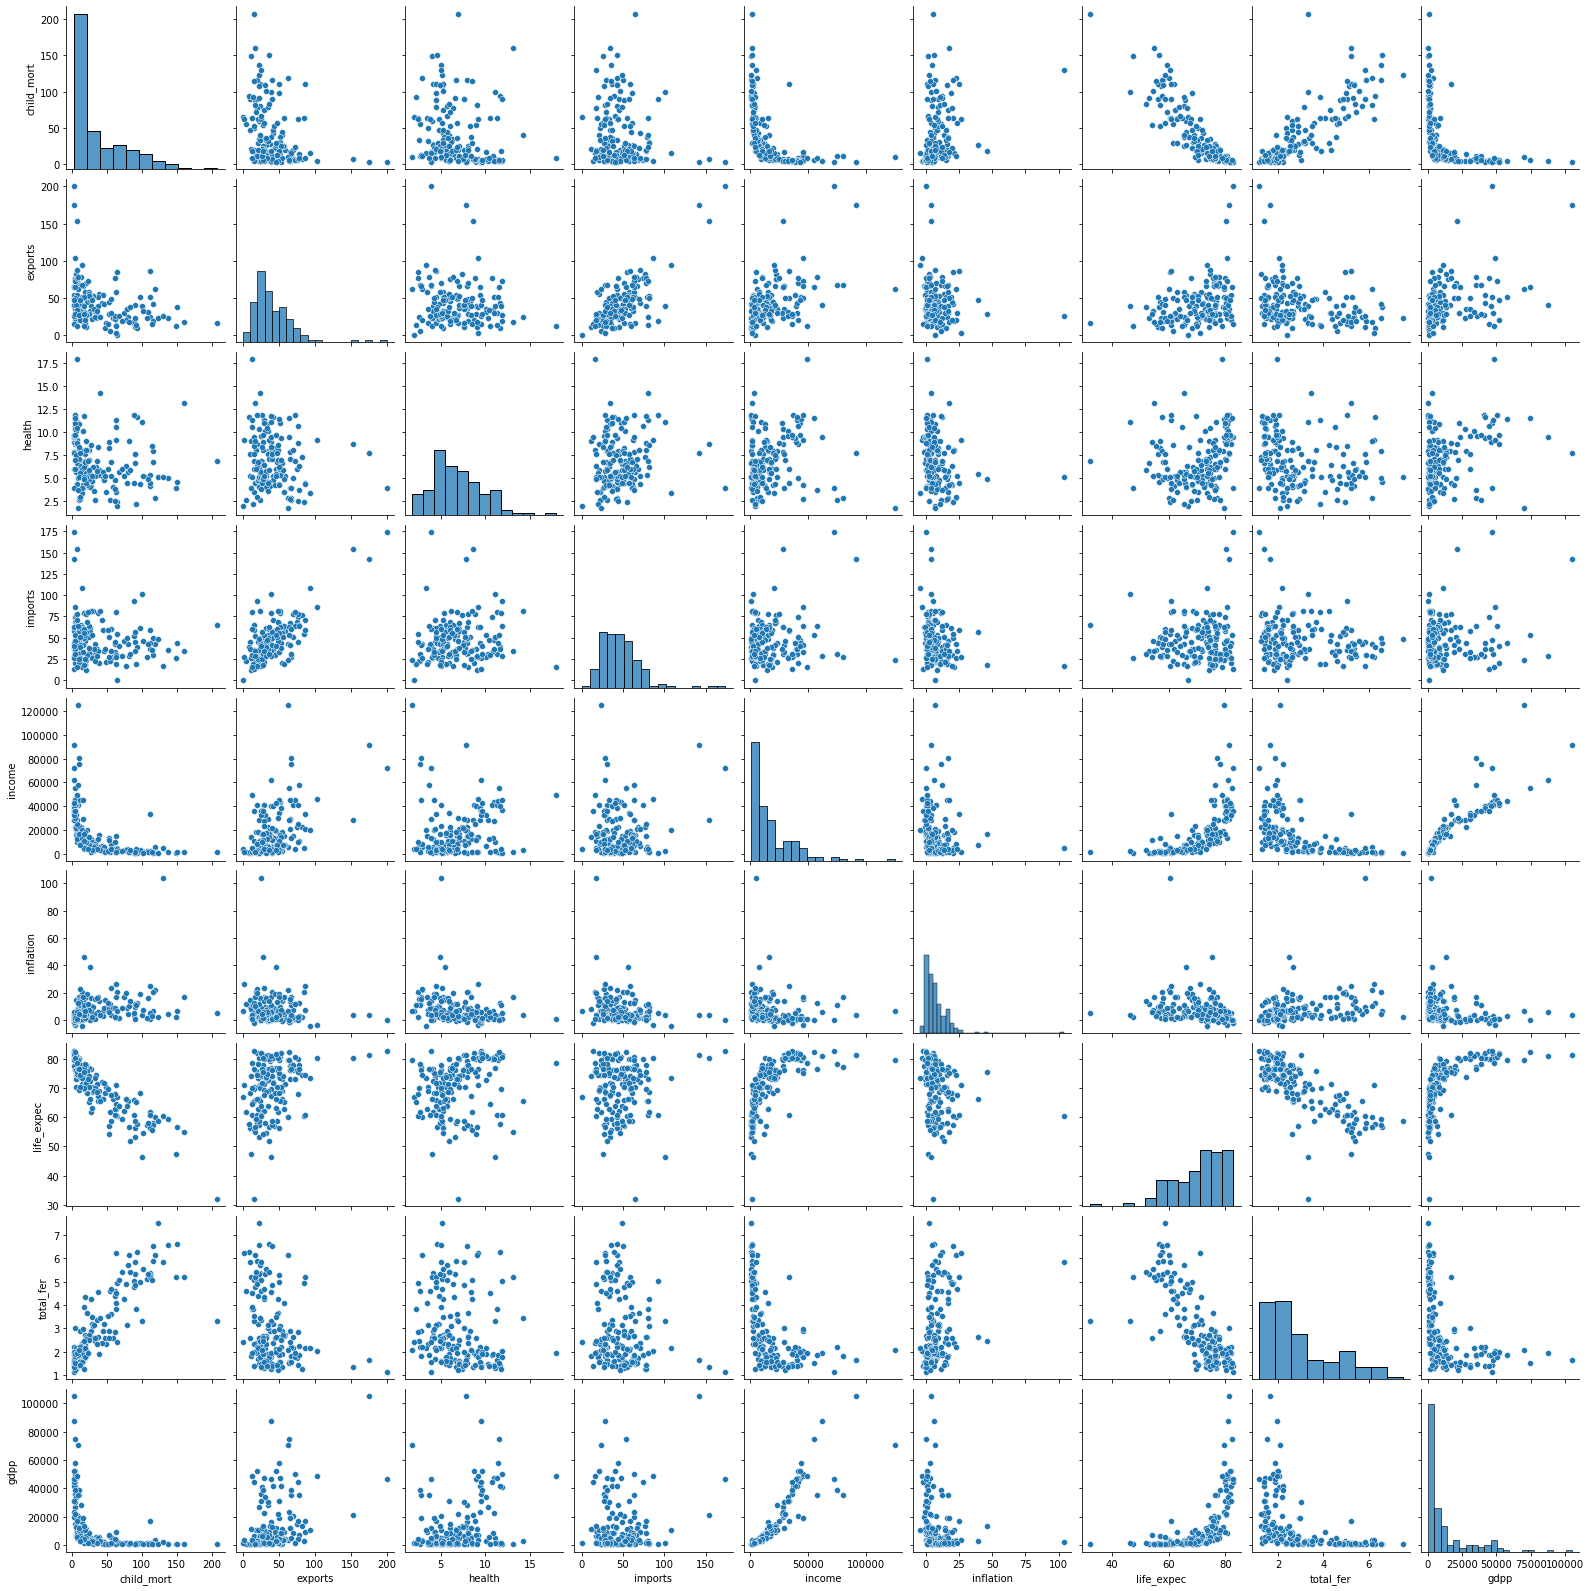

In [10]:
sns.pairplot(new_cn);

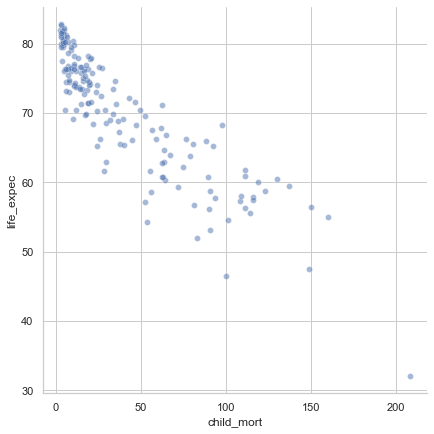

In [11]:
sns.set_theme(style="whitegrid")
sns.relplot(x="child_mort", y="life_expec",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=new_cn)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


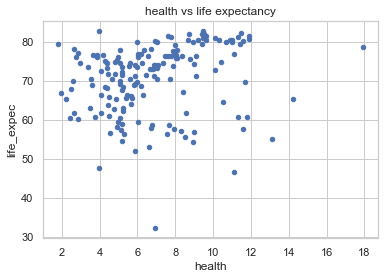

In [19]:
new_cn.plot.scatter(x="health", y="life_expec", alpha=1)
plt.title('health vs life expectancy')
plt.show()

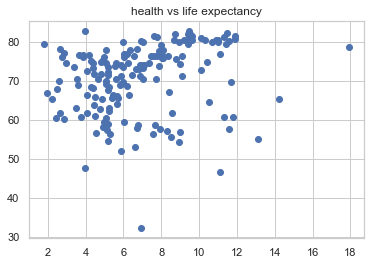

In [18]:
h= new_cn['health']
life = new_cn['life_expec']
plt.scatter(h,life)
plt.title('health vs life expectancy')
plt.show()

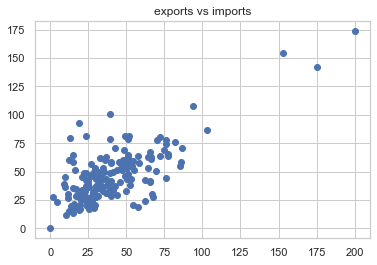

In [17]:
ex = new_cn['exports']
imp = new_cn['imports']
plt.scatter(ex,imp)
plt.title('exports vs imports');

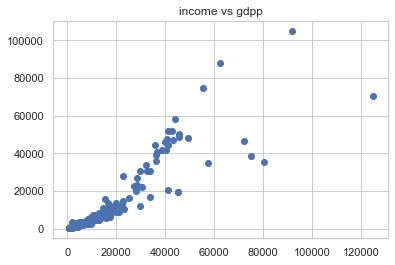

In [16]:
inc= new_cn['income']
gdp= new_cn['gdpp']
plt.scatter(inc,gdp)
plt.title("income vs gdpp");

## kmeans clustering

In [20]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(new_cn)
labels =model_k.predict(new_cn)   
print(labels)

[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


In [21]:
model_k.inertia_

21710210039.754147

C:\Users\babu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


117459687469.0782
36528387934.322105
21710210039.754147
14610713446.535133
10665874358.647745
7688785599.582989
5353767457.732319


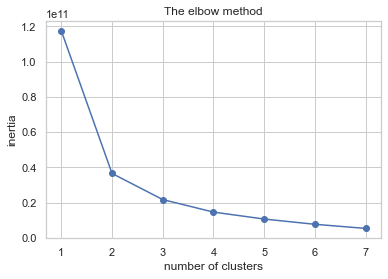

In [22]:
inertia=[]
for k in range (1,8):
    model = KMeans(n_clusters=k)
    model.fit(new_cn)
    inertia.append(model.inertia_)
    print(model.inertia_)
plt.plot(range(1,8),inertia,'-o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [23]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(new_cn)
labels =model_k.predict(new_cn)   
print(labels)

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 2 1 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [24]:
df1 = pd.DataFrame({'label': labels, 'country': cn['country']})
df1.head()

,label,country
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda


In [25]:
pd.crosstab(df1['label'],df1['country'])

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
label,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(new_cn, labels, metric='euclidean')
score

0.7106457354531156

In [27]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.711


In [28]:
cn['labels'] = pd.DataFrame({'label': labels})
cn.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [29]:
df3= pd.DataFrame({'country':cn['country'], 'labels':labels})
df3

,country,labels
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,0
...,...,...
162,Vanuatu,0
163,Venezuela,0
164,Vietnam,0
165,Yemen,0


# cluster 1

In [30]:
df3.loc[(df3['labels']==0),:]

,country,labels
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,0
...,...,...
162,Vanuatu,0
163,Venezuela,0
164,Vietnam,0
165,Yemen,0


# cluster 2

In [33]:
df3.loc[(df3['labels']==1),:]

,country,labels
7,Australia,1
8,Austria,1
10,Bahamas,1
11,Bahrain,1
15,Belgium,1
23,Brunei,1
29,Canada,1
42,Cyprus,1
43,Czech Republic,1
44,Denmark,1


# cluster 3

In [34]:
df3.loc[(df3['labels']==2),:]

,country,labels
91,Luxembourg,2
114,Norway,2
123,Qatar,2
145,Switzerland,2


Remarks : From k means clustering model, we can see cluster 1 is under developed countries that needs basic amenities. Cluster 2 and 3 includes developing and developed countries. 

## Agglomeric hierarchial Clustering

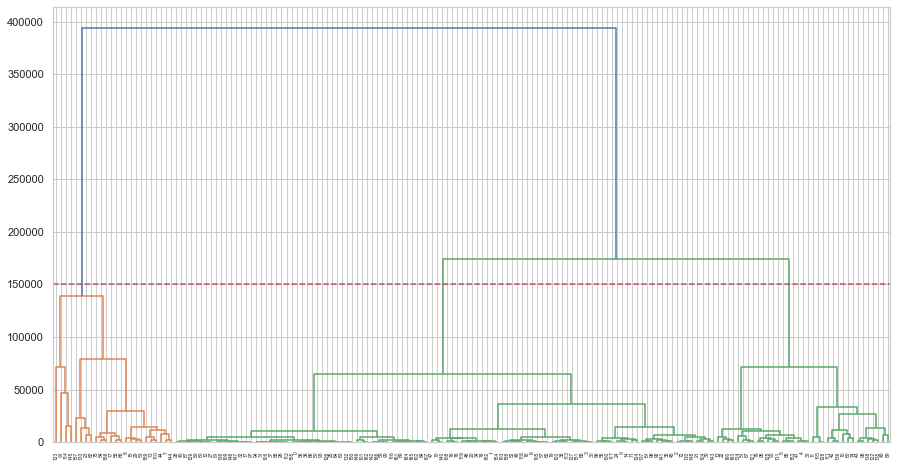

In [36]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(new_cn, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(150000,0,5000, colors='r', linestyles='--')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean', linkage = 'ward')
labels_agg=cluster.fit_predict(new_cn)
labels_agg

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [38]:
df2 = pd.DataFrame({'label': labels, 'country': cn['country']})
df2

,label,country
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,0,Yemen


In [39]:
pd.crosstab(df2['label'],df2['country'])

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
label,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
cn['labels'] = pd.DataFrame({'label': labels_agg})
cn.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [41]:
df4= pd.DataFrame({'country':cn['country'], 'labels':labels_agg})
df4

,country,labels
0,Afghanistan,2
1,Albania,2
2,Algeria,2
3,Angola,2
4,Antigua and Barbuda,1
...,...,...
162,Vanuatu,2
163,Venezuela,1
164,Vietnam,2
165,Yemen,2


### Cluster 1

In [42]:
df4.loc[(df4['labels']==0),:]

,country,labels
7,Australia,0
8,Austria,0
15,Belgium,0
23,Brunei,0
29,Canada,0
44,Denmark,0
53,Finland,0
54,France,0
58,Germany,0
68,Iceland,0


## cluster 2

In [43]:
df4.loc[(df4['labels']==1),:]

,country,labels
4,Antigua and Barbuda,1
5,Argentina,1
10,Bahamas,1
11,Bahrain,1
13,Barbados,1
22,Brazil,1
33,Chile,1
41,Croatia,1
42,Cyprus,1
43,Czech Republic,1


## Cluster 3

In [44]:
df4.loc[(df4['labels']==2),:]

,country,labels
0,Afghanistan,2
1,Albania,2
2,Algeria,2
3,Angola,2
6,Armenia,2
...,...,...
161,Uzbekistan,2
162,Vanuatu,2
164,Vietnam,2
165,Yemen,2


Remarks: from AHC model cluster 3 is under developed countries that requires basic amenities in need.

# standard scaling

In [47]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(new_cn)
scaled_data = pd.DataFrame(scaled_data, columns = new_cn.columns)
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


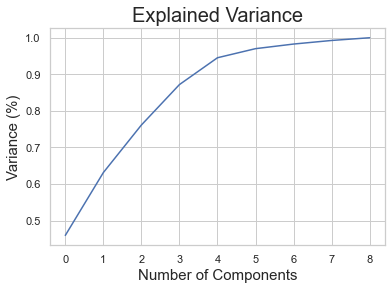

In [52]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)
plt.show()

In [53]:
# doing PCA
pca = PCA(n_components = 5)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(167, 5)

In [54]:
# displaying the PCA components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662]])

In [56]:
x_pca= pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2',
                                                        'principal component 3','principal component 4',
                                                        'principal component 5'])
x_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


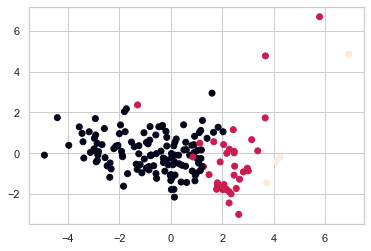

In [61]:
# plotting the PCA components
princ1= x_pca['principal component 1']
princ2= x_pca['principal component 2']
plt.scatter(princ1,princ2, c=labels);

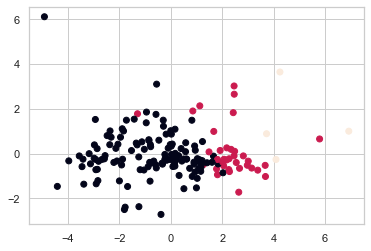

In [63]:
# plotting the PCA components
princ1= x_pca['principal component 1']
princ3= x_pca['principal component 3']
plt.scatter(princ1,princ3, c=labels);

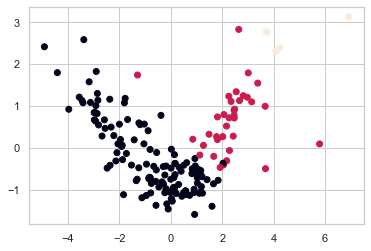

In [64]:
# plotting the PCA components
princ1= x_pca['principal component 1']
princ4= x_pca['principal component 4']
plt.scatter(princ1,princ4, c=labels);

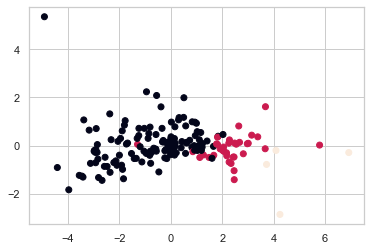

In [65]:
# plotting the PCA components
princ1= x_pca['principal component 1']
princ5= x_pca['principal component 5']
plt.scatter(princ1,princ5, c=labels);

<AxesSubplot:>

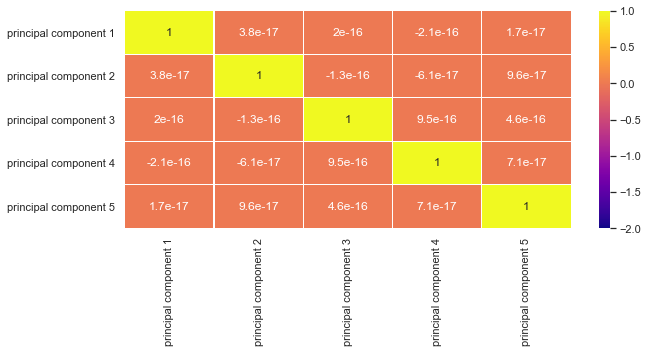

In [72]:
corrmatrix = x_pca.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True, linewidths=0.2,cmap='plasma')

In [73]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(x_pca)
labels =model_k.predict(x_pca)   
print(labels)

[2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 2 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 2 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 1 1 1 0 2 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


C:\Users\babu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1420.8008933928584
968.4663525507145
749.6189390258893
619.3219102800496
539.352150991085
494.82683293323527
433.06633619241046


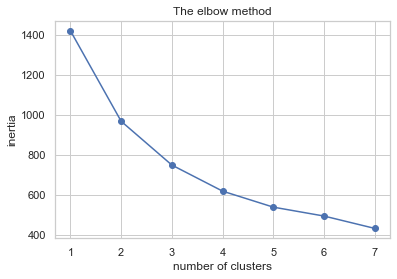

In [75]:
inertia=[]
for k in range (1,8):
    model = KMeans(n_clusters=k)
    model.fit(x_pca)
    inertia.append(model.inertia_)
    print(model.inertia_)
plt.plot(range(1,8),inertia,'-o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [76]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(x_pca)
labels =model_k.predict(x_pca)   
print(labels)

[2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 2 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 2 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 1 1 1 0 2 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [77]:
df1 = pd.DataFrame({'label': labels, 'country': cn['country']})
pd.crosstab(df1['label'],df1['country'])

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
label,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [78]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(x_pca, labels, metric='euclidean')
score

0.3079769786519014